In [ ]:
!pip install -r "/content/drive/MyDrive/Colab Notebooks/LEVX_1km/requirements.txt"

In [ ]:
!pip install lazypredict

In [1]:
import plotly.express as px
import pandas as pd
import numpy as np


coor = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEST/input_files/distan_lat42.896lon-8.415p4R4Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

In [2]:
from scipy.stats import shapiro
import pandas as pd


station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEST/input_files/LESTY2018Y2022.csv",
                          usecols = ["time","mslp_o"],
                          parse_dates=["time"]).set_index("time")

#Shapiro test normality
print("Shapiro test normality")


sta, p = shapiro(station.mslp_o.sample(500))

print("\np value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution pressure variable\n")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable no normal distribution pressure variable\n")  

                        
station["mslp_o"].describe()

Shapiro test normality

p value: 6.819948772385231e-11
Reject null Hypothesis. Alternative hypothesis variable no normal distribution pressure variable



count    90842.000000
mean      1018.134805
std          7.305043
min        975.000000
25%       1015.000000
50%       1019.000000
75%       1023.000000
max       1037.000000
Name: mslp_o, dtype: float64

**Forecast **

In [3]:
#Load
mody2018 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEST/input_files/lat42.896lon-8.415p4R4KmD1Y2018.csv",parse_dates=["time"])
mody2019 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEST/input_files/lat42.896lon-8.415p4R4KmD1Y2019.csv",parse_dates=["time"])
mody2020 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEST/input_files/lat42.896lon-8.415p4R4KmD1Y2020.csv",parse_dates=["time"])
mody2021 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEST/input_files/lat42.896lon-8.415p4R4KmD1Y2021.csv",parse_dates=["time"])
mody2022 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEST/input_files/lat42.896lon-8.415p4R4KmD1Y2022.csv",parse_dates=["time"])
model1k = pd.concat([mody2018,mody2019,mody2020,mody2021,mody2022]).drop(columns=["Unnamed: 0"]).set_index("time")

model1k

,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,...,cape3,cin3,cfh3,cfl3,cfm3,cft3,HGT5003,HGT8503,T5003,T8503
time,,,,,,,,,,,,,,,,,,,,,
2018-01-02 00:00:00,233.963104,0.0,1431.277588,8.529214,12.747702,103069.140625,284.533936,0.996536,14435.375977,-2.462172,...,27.370001,-0.000438,0.500000,0.624215,0.000000,0.624215,5684.005859,1578.303955,254.901123,277.214264
2018-01-02 01:00:00,232.617645,0.0,1450.688721,9.038249,13.097809,103024.101562,284.793640,0.991839,13233.881836,-1.087396,...,30.280001,-0.000438,0.000000,0.652011,0.000000,0.652011,5682.228027,1575.284058,255.174683,277.385498
2018-01-02 02:00:00,229.386154,0.0,1506.658691,9.148539,13.241504,102974.367188,284.805237,0.992409,12632.814453,-0.456407,...,8.658000,-0.000105,0.000000,0.703125,0.100000,0.703125,5680.491211,1573.386963,255.084564,278.089752
2018-01-02 03:00:00,224.010574,0.0,1530.089111,9.545937,13.720991,102908.781250,284.816742,0.996087,1235.833618,-0.508618,...,2.990000,-0.000125,0.000000,0.769529,0.200000,0.769529,5680.566895,1570.076050,254.978058,278.433868
2018-01-02 04:00:00,220.319962,0.0,1629.957764,8.721576,12.831500,102884.570312,284.905121,0.993239,14433.916016,-0.312250,...,1.244000,0.000562,0.296875,0.609375,0.600000,0.609375,5681.469238,1570.291016,255.305695,279.794739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-01 19:00:00,214.925400,0.0,1412.834229,3.840020,6.224229,101509.250000,282.401367,0.977776,24046.664062,1.376939,...,96.820000,-0.491957,0.300000,0.332929,0.000000,0.332929,5466.016113,1465.733032,252.778397,275.171875
2023-01-01 20:00:00,218.536026,0.0,1334.450562,3.384263,5.884864,101589.906250,282.391235,0.980421,24048.144531,1.292046,...,144.880005,-0.000320,0.100000,0.449521,0.000000,0.449521,5461.431152,1470.889771,251.670898,274.828064
2023-01-01 21:00:00,218.298325,0.0,1293.848755,3.525374,6.237169,101673.679688,282.288635,0.982895,24051.210938,0.569344,...,218.940002,0.002969,0.500000,0.357450,0.015625,0.500000,5455.578125,1474.774048,250.488861,274.894684


In [4]:
#concat station model
df_all1k = pd.concat([station,model1k],axis=1).dropna()
df_all1k

,mslp_o,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape3,cin3,cfh3,cfl3,cfm3,cft3,HGT5003,HGT8503,T5003,T8503
time,,,,,,,,,,,,,,,,,,,,,
2018-01-02 00:00:00,1030.0,233.963104,0.0,1431.277588,8.529214,12.747702,103069.140625,284.533936,0.996536,14435.375977,...,27.370001,-0.000438,0.500000,0.624215,0.000000,0.624215,5684.005859,1578.303955,254.901123,277.214264
2018-01-02 01:00:00,1030.0,232.617645,0.0,1450.688721,9.038249,13.097809,103024.101562,284.793640,0.991839,13233.881836,...,30.280001,-0.000438,0.000000,0.652011,0.000000,0.652011,5682.228027,1575.284058,255.174683,277.385498
2018-01-02 02:00:00,1029.0,229.386154,0.0,1506.658691,9.148539,13.241504,102974.367188,284.805237,0.992409,12632.814453,...,8.658000,-0.000105,0.000000,0.703125,0.100000,0.703125,5680.491211,1573.386963,255.084564,278.089752
2018-01-02 03:00:00,1029.0,224.010574,0.0,1530.089111,9.545937,13.720991,102908.781250,284.816742,0.996087,1235.833618,...,2.990000,-0.000125,0.000000,0.769529,0.200000,0.769529,5680.566895,1570.076050,254.978058,278.433868
2018-01-02 04:00:00,1029.0,220.319962,0.0,1629.957764,8.721576,12.831500,102884.570312,284.905121,0.993239,14433.916016,...,1.244000,0.000562,0.296875,0.609375,0.600000,0.609375,5681.469238,1570.291016,255.305695,279.794739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-30 19:00:00,1015.0,203.312912,0.0,2052.007812,13.638724,21.316725,101481.078125,287.015625,0.955191,15237.156250,...,13.450000,-0.153680,0.200000,0.718750,0.109375,0.718750,5590.645020,1488.197021,258.165497,280.460114
2022-12-30 20:00:00,1015.0,201.815460,0.0,2043.720459,13.186010,22.361063,101532.601562,287.144867,0.945404,15238.056641,...,17.870001,-0.202000,0.100000,0.726562,0.023438,0.726562,5594.009766,1491.375977,257.989868,280.390503
2022-12-30 21:00:00,1015.0,200.847214,0.0,2055.141113,12.703165,21.816742,101544.117188,287.186951,0.940966,12834.199219,...,25.750000,-0.350734,0.000000,0.796875,0.062500,0.796875,5593.878906,1492.337036,257.925873,280.522491


**Observed pressure (mslp_o) Vs forecasted pressure from meteorological model point 0 (mslp00)**

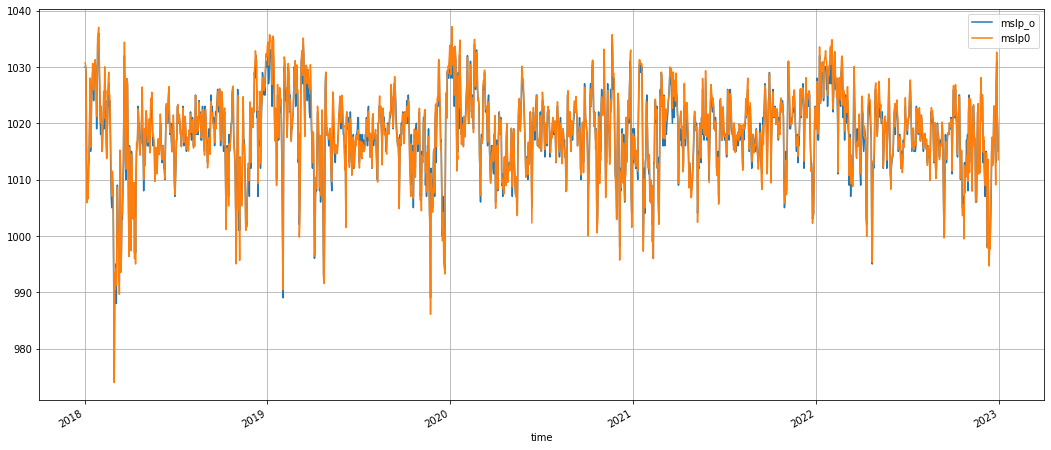

In [5]:
pd.concat([df_all1k["mslp_o"],df_all1k["mslp0"]/100],axis = 1)[0::24].plot(figsize = (18, 8),grid = True,);

**Meteorological model scores (Point 0)**

                 Mean_AE   MSE    R2  Median_AE
results point 0     1.04  1.83  0.96       0.84


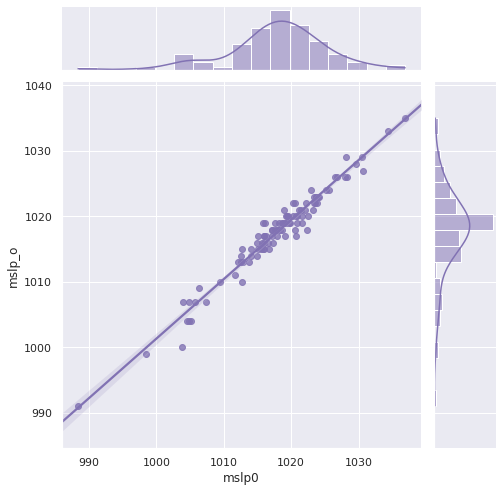

In [6]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import median_absolute_error
import seaborn as sns

#Mean absolute error
Mean_AE = round(mean_absolute_error(df_all1k["mslp_o"], df_all1k["mslp0"]/100),2)

#MSE 
MSE = round(mean_squared_error(df_all1k["mslp_o"], df_all1k["mslp0"]/100),2)

#R2
R2 = round(r2_score(df_all1k["mslp_o"], df_all1k["mslp0"]/100),2)

#Median absolute error
Median_AE = round(median_absolute_error(df_all1k["mslp_o"], df_all1k["mslp0"]/100),2)


#random seed 1
np.random.seed(1)

res = pd.concat([df_all1k["mslp_o"],df_all1k["mslp0"]/100],axis = 1)
sns.set_theme(style="darkgrid")
g = sns.jointplot(x="mslp0", y="mslp_o", data=res.sample(100),
                  kind="reg", truncate=False,
                  color="m", height=7)

print(pd.DataFrame({"Mean_AE":Mean_AE,"MSE":MSE,"R2":R2,"Median_AE":Median_AE},index=["results point 0"]))


**Meteorological model scores (Point 1)**

                 Mean_AE   MSE    R2  Median_AE
results point 1     1.05  1.88  0.96       0.85


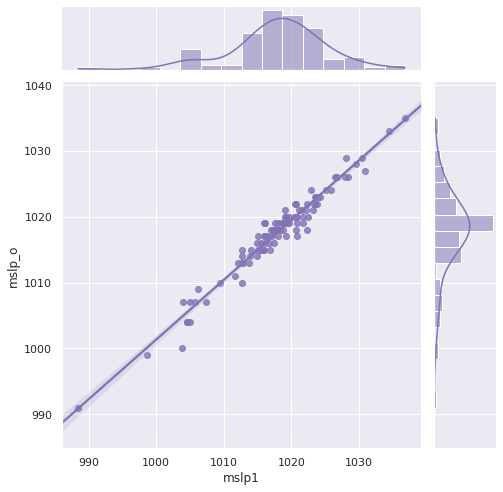

In [7]:

#Mean absolute error
Mean_AE = round(mean_absolute_error(df_all1k["mslp_o"], df_all1k["mslp1"]/100),2)

#MSE 
MSE = round(mean_squared_error(df_all1k["mslp_o"], df_all1k["mslp1"]/100),2)

#R2
R2 = round(r2_score(df_all1k["mslp_o"], df_all1k["mslp1"]/100),2)

#Median absolute error
Median_AE = round(median_absolute_error(df_all1k["mslp_o"], df_all1k["mslp1"]/100),2)

#random seed 1
np.random.seed(1)

res = pd.concat([df_all1k["mslp_o"],df_all1k["mslp1"]/100],axis = 1)
sns.set_theme(style="darkgrid")
g = sns.jointplot(x="mslp1", y="mslp_o", data=res.sample(100),
                  kind="reg", truncate=False,
                  color="m", height=7)


print(pd.DataFrame({"Mean_AE":Mean_AE,"MSE":MSE,"R2":R2,"Median_AE":Median_AE},index=["results point 1"]))

**Meteorological model independent variables X**

In [8]:
df_all1k.iloc[:,1:].columns


Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0',
       'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'snow_prec1',
       'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1',
       'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1',
       'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001',
       'HGT8501', 'T5001', 'T8501', 'dir2', 'snow_prec2', 'snowlevel2', 'mod2',
       'wind_gust2', 'mslp2', 'temp2', 'rh2', 'visibility2', 'lhflx2',
       'lwflx2', 'conv_prec2', 'prec2', 'swflx2', 'shflx2', 'cape2', 'cin2',
       'cfh2', 'cfl2', 'cfm2', 'cft2', 'HGT5002', 'HGT8502', 'T5002', 'T8502',
       'dir3', 'snow_prec3', 'snowlevel3', 'mod3', 'wind_gust3', 'mslp3',
       'temp3', 'rh3', 'visibility3', 'lhflx3', 'lwflx3', 'conv_prec3',
       'prec3', 'swflx3', '

**Find ML algorithm**

In [ ]:
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

# X and Y
Y = df_all1k["mslp_o"]
X = df_all1k.iloc[:,1:]


X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyRegressor(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)

 95%|█████████▌| 39/41 [05:25<00:12,  6.28s/it]

[08:58:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 41/41 [05:32<00:00,  8.12s/it]


In [ ]:
models

**LGBMRegressor (y_test from lazypredict)**

In [ ]:
Mean_AE = round(mean_absolute_error(y_test, predictions.LGBMRegressor),2)
MSE = round(mean_squared_error(y_test, predictions.LGBMRegressor),2)
R2 = round(r2_score(y_test, predictions.LGBMRegressor),2)
Median_AE = round(median_absolute_error(y_test, predictions.LGBMRegressor),2)

print(pd.DataFrame({"Mean_AE":Mean_AE,"MSE":MSE,"R2":R2,"Median_AE":Median_AE},index=["results LGBMRegressor"]))



                       Mean_AE  MSE   R2  Median_AE
results LGBMRegressor     0.55 0.51 0.99       0.45


**ExtraTreesRegressor (y_test from lazypredict)**

In [ ]:
Mean_AE = round(mean_absolute_error(y_test, predictions.ExtraTreesRegressor),2)
MSE = round(mean_squared_error(y_test, predictions.ExtraTreesRegressor),2)
R2 = round(r2_score(y_test, predictions.ExtraTreesRegressor),2)
Median_AE = round(median_absolute_error(y_test, predictions.ExtraTreesRegressor),2)

print(pd.DataFrame({"Mean_AE":Mean_AE,"MSE":MSE,"R2":R2,"Median_AE":Median_AE},index=["results ExtraTreesRegressor"]))

                             Mean_AE  MSE   R2  Median_AE
results ExtraTreesRegressor     0.51 0.46 0.99       0.39


**lgbmregressor ML algorithm selected**

In [9]:
from lightgbm.sklearn import LGBMRegressor
from sklearn.model_selection import train_test_split

#random seed 1
np.random.seed(1)

# X and Y
Y = df_all1k.mslp_o
X = df_all1k.iloc[:,1:]

# loop random
Median_AE_ml = []
Mean_AE_ml =[]
MSE_ml = []
R2_ml = []

#20 samples to test algorithm
for t in range (0,5):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  #machine learning model
  ml_model = LGBMRegressor().fit(X_train,y_train)
  y_pred = ml_model.predict(X_test)
  
  #Score calculation
  Mean_AE_ml.append(round(mean_absolute_error(y_test, y_pred),2))
  Median_AE_ml.append(round(median_absolute_error(y_test, y_pred),2))
  MSE_ml.append (round(mean_squared_error(y_test, y_pred),2))
  R2_ml.append(round(r2_score(y_test, y_pred),2))
  
  
print(pd.DataFrame({"Median_AE":Median_AE_ml," Mean_AE":Mean_AE_ml,"MSE":MSE_ml,"R2":R2_ml}))

   Median_AE   Mean_AE   MSE    R2
0       0.59      0.72  0.88  0.98
1       0.58      0.73  0.95  0.98
2       0.58      0.72  0.87  0.98
3       0.58      0.72  0.89  0.98
4       0.57      0.73  0.92  0.98


**T test (1sample) compare machine learning median absolute error in a sample (n=
5) versus meteorological model median absolute error at point 0 (0.8) and at point 1 (0.8). the alternative hypothesis is: the mean of the underlying distribution of the sample is less than the given population mean (popmean). Significance level (alpha) = 0.01**

In [11]:
from scipy import stats

alpha = 0.01
sta0, p_value0 = stats.ttest_1samp(Median_AE_ml, popmean=0.8, alternative="less")
sta1, p_value1 = stats.ttest_1samp(Median_AE_ml, popmean=0.8, alternative="less")

print("\nalpha: ",alpha)

print("\nMedian Absolute error list from machine learning test:",Median_AE_ml)
print("\n**** Point 0 ****")
print("\np_value point 0:",p_value0)
if p_value0 < alpha:    
    print("\nwe are rejecting null hypothesis  H0: Median Absolute Error machine learning = Median Absolute Error meteorological model point 0")
    print("\nwe are accepting alternative hypothesis: Median Absolute Error machine learning is less than Median Absolute Error meteorological point 0")
else:
    print("\nwe are accepting null hypothesis:  H0:  Median Absolute Error machine learning = Median Absolute Error meteorological model point 0 ")

print("\n**** Point 1 ****")
print("\np value point 1:",p_value1 )
if p_value1 < alpha:    
    print("\nwe are rejecting null hypothesis  H0: Median Absolute Error machine learning = Median Absolute Error meteorological model point 1")
    print("\nwe are accepting alternative hypothesis: Median Absolute Error machine learning is less than Median Absolute Error meteorological point 1")
else:
    print("\nwe are accepting null hypothesis:  H0  Median Absolute Error machine learning = Median Absolute Error meteorological model point 1")


alpha:  0.01

Median Absolute error list from machine learning test: [0.59, 0.58, 0.58, 0.58, 0.57]

**** Point 0 ****

p_value point 0: 1.2788881592914676e-07

we are rejecting null hypothesis  H0: Median Absolute Error machine learning = Median Absolute Error meteorological model point 0

we are accepting alternative hypothesis: Median Absolute Error machine learning is less than Median Absolute Error meteorological point 0

**** Point 1 ****

p value point 1: 1.2788881592914676e-07

we are rejecting null hypothesis  H0: Median Absolute Error machine learning = Median Absolute Error meteorological model point 1

we are accepting alternative hypothesis: Median Absolute Error machine learning is less than Median Absolute Error meteorological point 1


**Add time variables**

In [12]:
df_all1k["hour"] = df_all1k.index.hour
df_all1k["month"] = df_all1k.index.month
df_all1k["dayofyear"] = df_all1k.index.dayofyear
df_all1k["weekofyear"] = df_all1k.index.isocalendar().week.astype(int)

**Machine learning with time variables**

 **X variables**

In [13]:
 df_all1k.iloc[:,1:].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0',
       ...
       'cfm3', 'cft3', 'HGT5003', 'HGT8503', 'T5003', 'T8503', 'hour', 'month',
       'dayofyear', 'weekofyear'],
      dtype='object', length=104)

In [14]:
#random seed 1
np.random.seed(1)

# X and Y
Y = df_all1k.mslp_o
X = df_all1k.iloc[:,1:]

# loop random
Median_AE_ml_t = []
Mean_AE_ml_t =[]
MSE_ml_t = []
R2_ml_t = []

#20 samples to test algorithm
for t in range (0,5):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  #machine learning model
  ml_model = LGBMRegressor().fit(X_train,y_train)
  y_pred = ml_model.predict(X_test)
  
  #Score calculation
  Mean_AE_ml_t.append(round(mean_absolute_error(y_test, y_pred),2))
  Median_AE_ml_t.append(round(median_absolute_error(y_test, y_pred),2))
  MSE_ml_t.append (round(mean_squared_error(y_test, y_pred),2))
  R2_ml_t.append(round(r2_score(y_test, y_pred),2))
  
  
print(pd.DataFrame({"Median_AE":Median_AE_ml_t," Mean_AE":Mean_AE_ml_t,"MSE":MSE_ml_t,"R2":R2_ml_t}))

   Median_AE   Mean_AE   MSE    R2
0       0.55      0.68  0.77  0.99
1       0.54      0.69  0.83  0.98
2       0.55      0.67  0.76  0.99
3       0.54      0.68  0.79  0.98
4       0.54      0.69  0.82  0.98


In [15]:
feature_importances = ml_model.feature_importances_
total_sum = sum(feature_importances)
feature_importances_perc = [(importance/total_sum)*100 for importance in feature_importances]
# Print the feature importances as a percentage of total feature importance

for name, importance in zip(X.columns, feature_importances_perc):
    print(f"{name}: {importance:.1f}%")

dir0: 1.6%
snow_prec0: 0.0%
snowlevel0: 1.2%
mod0: 0.5%
wind_gust0: 1.0%
mslp0: 7.4%
temp0: 0.5%
rh0: 1.1%
visibility0: 0.5%
lhflx0: 0.3%
lwflx0: 1.0%
conv_prec0: 0.1%
prec0: 0.3%
swflx0: 0.0%
shflx0: 0.6%
cape0: 0.7%
cin0: 0.7%
cfh0: 0.4%
cfl0: 0.2%
cfm0: 0.3%
cft0: 0.1%
HGT5000: 0.9%
HGT8500: 2.2%
T5000: 2.0%
T8500: 1.3%
dir1: 2.3%
snow_prec1: 0.0%
snowlevel1: 1.1%
mod1: 1.2%
wind_gust1: 0.9%
mslp1: 2.7%
temp1: 1.1%
rh1: 0.6%
visibility1: 0.7%
lhflx1: 0.2%
lwflx1: 0.8%
conv_prec1: 0.3%
prec1: 0.3%
swflx1: 0.1%
shflx1: 1.2%
cape1: 1.0%
cin1: 0.7%
cfh1: 0.5%
cfl1: 0.4%
cfm1: 0.3%
cft1: 0.1%
HGT5001: 0.4%
HGT8501: 1.2%
T5001: 1.1%
T8501: 1.0%
dir2: 1.3%
snow_prec2: 0.0%
snowlevel2: 1.3%
mod2: 0.4%
wind_gust2: 0.7%
mslp2: 3.1%
temp2: 0.3%
rh2: 0.6%
visibility2: 0.5%
lhflx2: 0.3%
lwflx2: 1.0%
conv_prec2: 0.3%
prec2: 0.1%
swflx2: 0.1%
shflx2: 0.4%
cape2: 0.7%
cin2: 0.6%
cfh2: 0.2%
cfl2: 0.2%
cfm2: 0.5%
cft2: 0.4%
HGT5002: 0.8%
HGT8502: 3.0%
T5002: 1.6%
T8502: 1.5%
dir3: 1.8%
snow_prec3: 0.

**T test two related samples. This is a test for the null hypothesis that two related samples have identical Median Absolute Error. Alternative hypothesis the Median Absolute Error of the distribution underlying the sample with time variables is less than the Median Absolute Error of the distribution underlying the sample without time variables. Significance level (alpha) = 0.01**

In [16]:
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(Median_AE_ml_t, Median_AE_ml, alternative="less")

print("\nMedian absolute error without time variables:", Median_AE_ml)
print("\nMedian absolute error with time variables:", Median_AE_ml_t)

print("\nalpha: ",alpha)

print("\np_value point: ",p_value)
if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: Median absolute error machine learning without time variables = Median absolute error machine learning with time variables")
    print("\nwe are accepting alternative hypothesis: Median absolute error of the sample with time variables inputs is less than the Median absolute error of the sample without time variables inputs")
else:
    print("\nwe are accepting null hypothesis:  H0: Median absolute error machine learning without time variables = Median absolute error machine learning with time variables")
     


Median absolute error without time variables: [0.59, 0.58, 0.58, 0.58, 0.57]

Median absolute error with time variables: [0.55, 0.54, 0.55, 0.54, 0.54]

alpha:  0.01

p_value point:  6.236301762079848e-05

we are rejecting null hypothesis  H0: Median absolute error machine learning without time variables = Median absolute error machine learning with time variables

we are accepting alternative hypothesis: Median absolute error of the sample with time variables inputs is less than the Median absolute error of the sample without time variables inputs


**Save algorithm**

In [17]:
import pickle
from sklearn.pipeline import Pipeline

x_var = df_all1k.iloc[:,1:].columns
estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":x_var,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("pres_LEST_d1.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMRegressor())])
